## import libraries

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

## Load Data

In [8]:
train = pd.read_csv("./kaggle/input/playground-series-s6e2/train.csv")
test = pd.read_csv("./kaggle/input/playground-series-s6e2/test.csv")
sample_submit = pd.read_csv("./kaggle/input/playground-series-s6e2/sample_submission.csv")

In [9]:
train.head()

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,Presence
1,1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,Absence
2,2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,Absence
3,3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,Absence
4,4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,Presence


In [11]:
train.info()

<class 'pandas.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       630000 non-null  int64  
 1   Age                      630000 non-null  int64  
 2   Sex                      630000 non-null  int64  
 3   Chest pain type          630000 non-null  int64  
 4   BP                       630000 non-null  int64  
 5   Cholesterol              630000 non-null  int64  
 6   FBS over 120             630000 non-null  int64  
 7   EKG results              630000 non-null  int64  
 8   Max HR                   630000 non-null  int64  
 9   Exercise angina          630000 non-null  int64  
 10  ST depression            630000 non-null  float64
 11  Slope of ST              630000 non-null  int64  
 12  Number of vessels fluro  630000 non-null  int64  
 13  Thallium                 630000 non-null  int64  
 14  Heart Disease  

## Visualiza Data

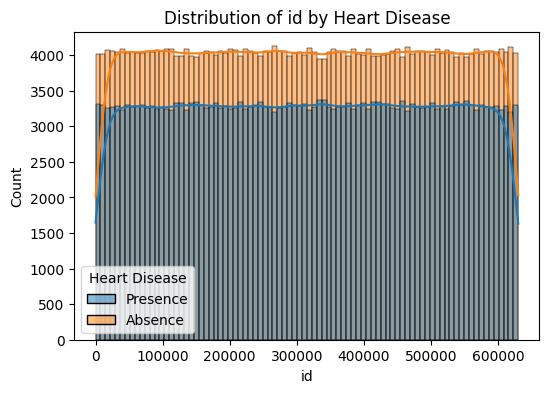

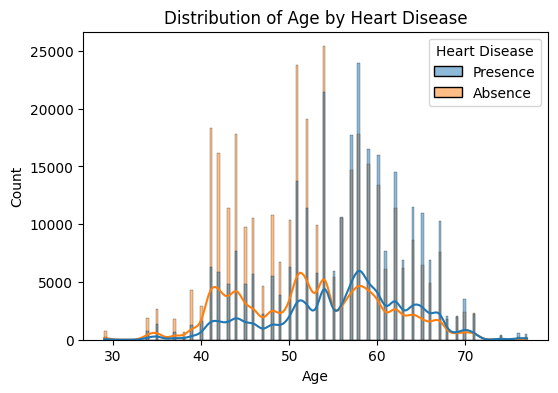

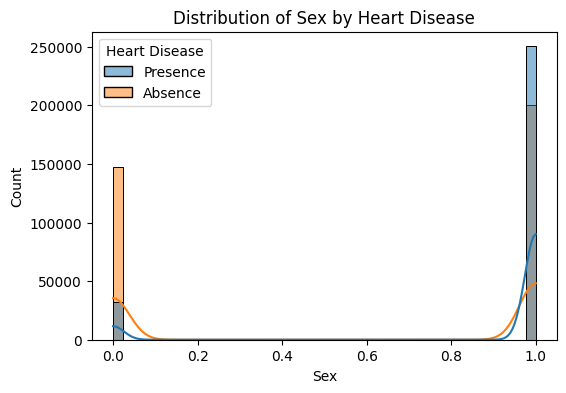

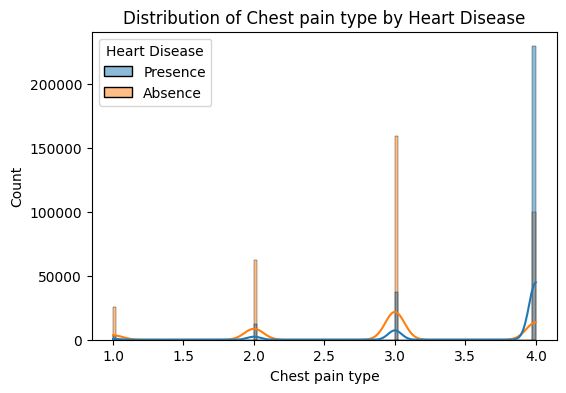

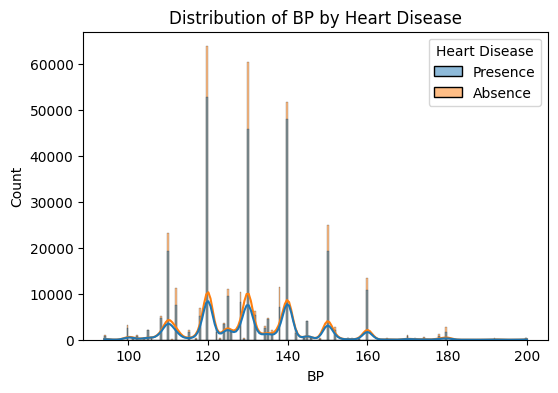

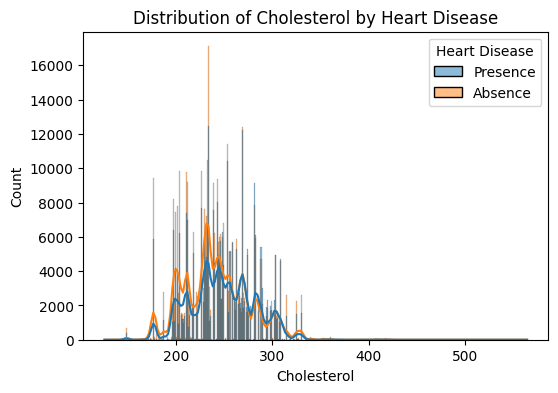

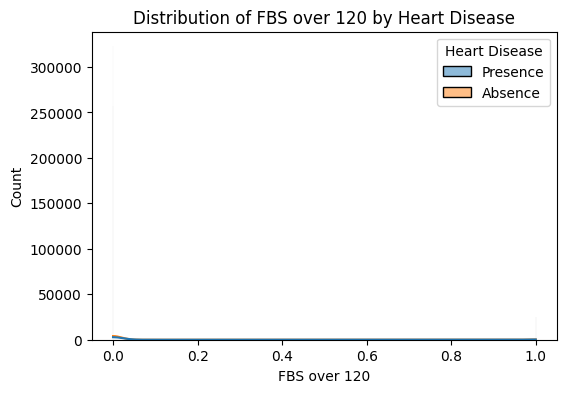

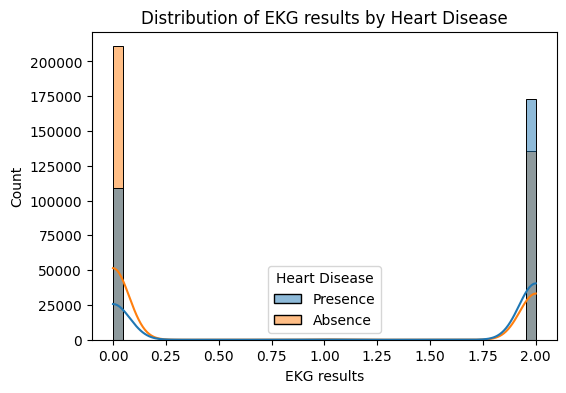

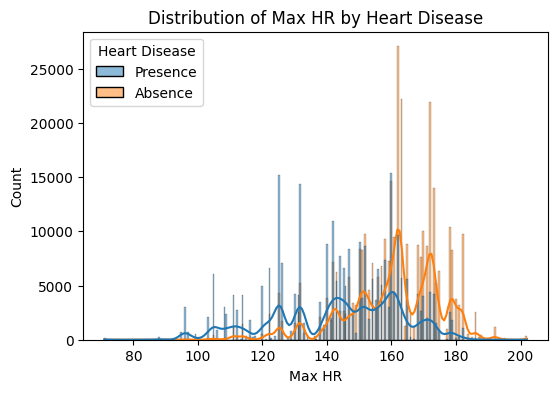

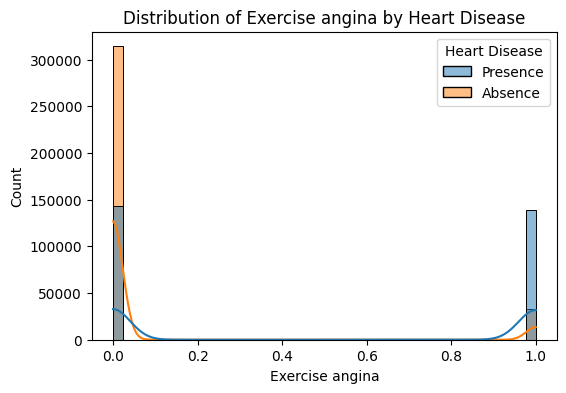

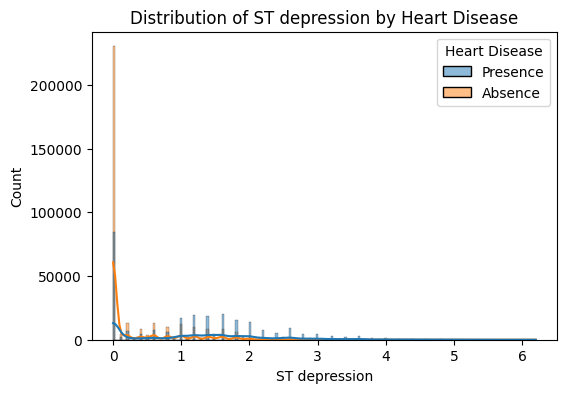

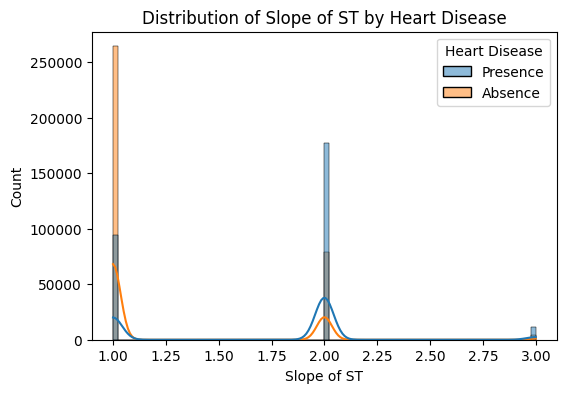

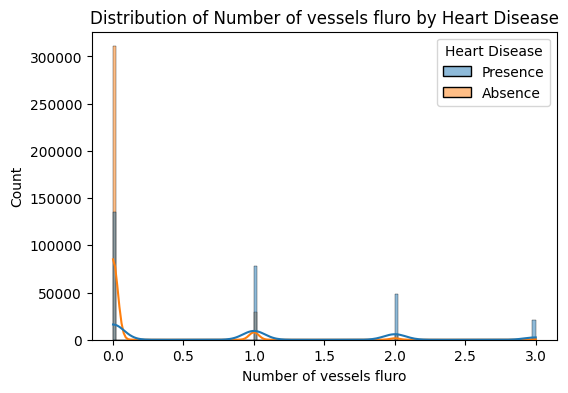

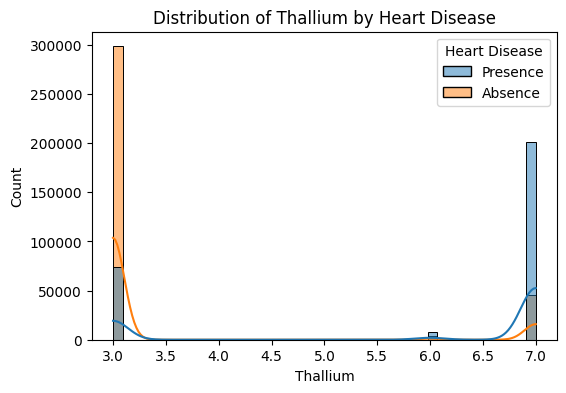

In [ ]:
X = train.drop('Heart Disease', axis=1)
y = train['Heart Disease']

y_encoded = LabelEncoder().fit_transform(y)

features = [col for col in train.columns if col != 'Heart Disease']
for feature in features:
    plt.figure(figsize=(6,4))
    sns.histplot(data=train, x=feature, hue='Heart Disease', kde=True)
    plt.title(f'Distribution of {feature} by Heart Disease')
    plt.show()

In [24]:
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=1)

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train,y_train)

rf_preds=rf.predict_proba(X_val)[:,1]
print("ROC AUC:", roc_auc_score(y_val, rf_preds))

xgb = XGBClassifier(
    n_estimators=500,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)

xgb.fit(X_train, y_train)

xgb_preds = xgb.predict_proba(X_val)[:, 1]

print("ROC AUC:", roc_auc_score(y_val, xgb_preds))


ROC AUC: 0.9519199963186276
ROC AUC: 0.9551218872301778


Based on the ROC values XGBoost has a higher accuracy

## Submission

In [25]:
final_preds = xgb.predict_proba(test)[:,1]

submission = pd.DataFrame({
    'id': test['id'],
    'Heart Disease': final_preds
})

# Save submission file in required format (id,Heart Disease)
submission.to_csv('submission.csv', index=False)
print('Saved submission.csv in required format')
submission.head()

Saved submission.csv in required format


,id,Heart Disease
0,630000,0.943787
1,630001,0.006723
2,630002,0.983482
3,630003,0.006330
4,630004,0.160805
